In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os
import re

In [2]:
#run a nested for loop to get the file names
#write a function to load and display the FFT plot for that specific trap voltage configuration
#could the double peak be detected automatically without manually inspecting every datapoint?

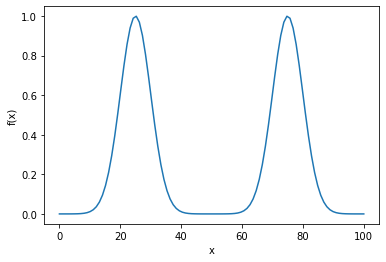

In [3]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x  = np.linspace(0, 100, 100)
y1 = gaussian(x[:50], 25, 5)
y2 = gaussian(x[50:], 75, 5)
y  = np.append(y1, y2)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)');

In [4]:
def load_folder(folder):
    files = [f for f in os.listdir(folder)]
    components = []
    file_dict = {}
    for f in files:
        volt, ratio, a = f.split('_')
        volt = float(volt)
        tr = float(ratio)
        a = float(re.findall(r'(.*).csv', a)[0])
        components.append([f, volt, tr, a])
        file_dict[f] = [volt, tr, a]
        
    return files, components, file_dict

In [6]:
x = np.arange(0, 4, 0.1)
data = .2*np.sin(10*x)+ np.exp(-np.abs(2-x)**2)

# that's the line, you need:
#a = np.diff(np.sign(diff(data))).nonzero()[0] + 1 # local min+max
#b = (np.diff(np.sign(np.diff(data))) > 0).nonzero()[0] + 1 # local min
c = (diff(sign(diff(data))) < 0).nonzero()[0]+1 # local max


# graphical output...
from pylab import *
plot(x,data)
#plot(x[b], data[b], "o", label="min")
plot(x[c], data[c], "o", label="max")
legend()
show()

NameError: name 'diff' is not defined

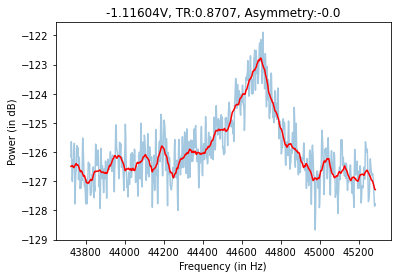

In [5]:
from math import factorial
def savitzky_golay(y, window_size, order, deriv=0, rate=1):  
    # try:
    #     window_size = np.abs(np.int(window_size))
    #     order = np.abs(np.int(order))
    # except ValueError, msg:
    #     raise ValueError("window_size and order have to be of type int")
    # if window_size % 2 != 1 or window_size < 1:
    #     raise TypeError("window_size size must be a positive odd number")
    # if window_size < order + 2:
    #     raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')


files, components, file_dict = load_folder("Trap Scan")

df = pd.read_csv("Trap Scan/-1.11604_0.8707_-0.0.csv")
freq, power = np.array(df['0']), np.array(df['1'])
plt.plot(freq, power, alpha=0.4)
power_hat = savitzky_golay(power, 51, 3)
plt.plot(freq, power_hat, color='r')
plt.xlabel("Frequency (in Hz)")
plt.ylabel("Power (in dB)")
plt.title(f"{file_dict['-1.11604_0.8707_-0.0.csv'][0]}V, TR:{file_dict['-1.11604_0.8707_-0.0.csv'][1]}, Asymmetry:{file_dict['-1.11604_0.8707_-0.0.csv'][2]}");

In [10]:
def plot_grid(index, edge, read_folder, save_folder):
    plt.rcParams["figure.figsize"] = [100, 50]
    plt.rcParams["figure.autolayout"] = True
    #plt.style.use('seaborn')    
    fig, ax = plt.subplots(edge,edge)
    files, components, file_dict = load_folder(read_folder)
    
    iter_ = 0
    for i in range(edge):
        for j in range(edge):
            ax[i, j].set_title(f"{components[index+iter_][1]}V, TR:{components[index+iter_][2]}, Asymmetry:{components[index+iter_][3]}", fontsize=70)
            df = pd.read_csv(f"{read_folder}/{components[index+iter_][0]}")
            freq, power = np.array(df['0']), np.array(df['1'])
            ax[i, j].plot(freq, power, alpha=0.4)
            power_hat = savitzky_golay(power, 51, 3)
            ax[i, j].plot(freq, power_hat, color='r')
            ax[i, j].set_xlabel("Frequency (in Hz)", fontsize=50)
            ax[i, j].set_ylabel("Power (in dB)", fontsize=50)
            ax[i, j].tick_params(axis='x', which='both', labelsize=35)
            ax[i, j].tick_params(axis='y', which='both', labelsize=35)
            iter_+=1
            
    fig.suptitle(f"Power Spectra ({read_folder}): Indices {index} to {index+edge*edge-1}", fontsize=100, y=1)
    #fig.tight_layout()
    fig.subplots_adjust(top=5.85)
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
    plt.savefig(f"{save_folder}/{index} to {index+edge*edge-1}.png")
    plt.close()
    
#plot_grid(0, 4, "Trap Scan", "Trap Scan Plots")

In [11]:
for i in range(3184, 6000, 16):
    plot_grid(i, 4, "Trap Scan Weekend", "Trap Scan Weekend Plots")